In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
newdata = pd.read_csv('/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/rohan_merged_data_rna_seq_rsem.csv')

In [ ]:
class_counts = newdata['Disease_Free_Status'].value_counts()

print(class_counts)

0:DiseaseFree            856
1:Recurred/Progressed     84
Name: Disease_Free_Status, dtype: int64


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/train_data.csv')
val_data = pd.read_csv('/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/val_data.csv')

In [ ]:
train_data.info()

In [ ]:
class_counts = train_data['Disease_Free_Status'].value_counts()

print(class_counts)

In [ ]:
X_train = train_data.drop(['Disease_Free_Status'], axis = 1)
y_train = train_data['Disease_Free_Status']

In [ ]:
X_val = val_data.drop(['Disease_Free_Status'], axis = 1)
y_val = val_data['Disease_Free_Status']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
class_counts = y_resampled.value_counts()

print(class_counts)

In [ ]:
hypertrees = 50
depth = 5

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=hypertrees, max_depth=depth, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [ ]:
# Predict labels on validation set
y_val_pred = rf_classifier.predict(X_val)

# Calculate accuracy and recall on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)

print("Validation Accuracy:", accuracy_val)
print("Validation Recall:", recall_val)

Validation Accuracy: 0.7350993377483444
Validation Recall: 0.3333333333333333


In [ ]:
test_data = pd.read_csv('/content/drive/Shareddrives/1:1_Rohan_Kaushikan/Dataset/test_data.csv')

In [ ]:
X_test = test_data.drop(['Disease_Free_Status'], axis = 1)
y_test = test_data['Disease_Free_Status']

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.75
Recall: 0.35714285714285715


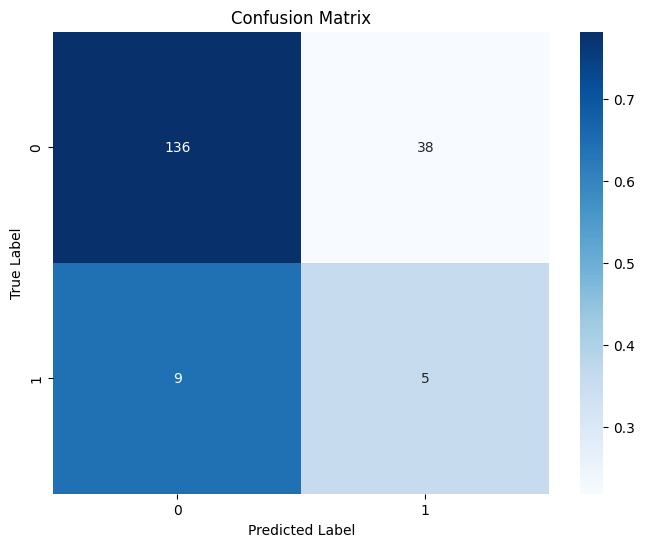

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Construct Confusion Matrix
constructed_confusion_matrix = confusion_matrix(y_pred, y_test)

# Print Confusion Matrix
print("Confusion matrix using sklearn \n \n", constructed_confusion_matrix)

Confusion matrix using sklearn 
 
 [[171  12]
 [  3   2]]


In [ ]:
#predictions probabilites
#this will be used in generating roc_curve
y_score = rf_classifier.predict_proba(X_test)
print("Prediction scores: ", *y_score)

Prediction scores:  [0.97 0.03] [0.86 0.14] [9.996875e-01 3.125000e-04] [0.97 0.03] [0.99 0.01] [0.87 0.13] [0.98 0.02] [0.9 0.1] [0.8196875 0.1803125] [0.97 0.03] [0.96 0.04] [1. 0.] [0.71 0.29] [0.95 0.05] [0.98 0.02] [0.8625 0.1375] [0.77 0.23] [0.96 0.04] [1. 0.] [0.97 0.03] [0.98 0.02] [1. 0.] [0.97 0.03] [0.98 0.02] [0.98 0.02] [0.9 0.1] [0.38 0.62] [0.97 0.03] [0.85666667 0.14333333] [0.81 0.19] [0.9 0.1] [0.9196875 0.0803125] [0.97 0.03] [0.85666667 0.14333333] [0.89 0.11] [0.95 0.05] [0.87 0.13] [0.85 0.15] [0.98 0.02] [0.9325 0.0675] [0.94 0.06] [1. 0.] [0.98 0.02] [0.61 0.39] [0.91 0.09] [1. 0.] [0.73 0.27] [0.97 0.03] [0.87 0.13] [0.91 0.09] [0.93 0.07] [0.93 0.07] [0.87 0.13] [0.92 0.08] [0.98 0.02] [0.98 0.02] [1. 0.] [0.96 0.04] [0.9796875 0.0203125] [0.42 0.58] [1. 0.] [0.77 0.23] [0.98 0.02] [0.23 0.77] [0.95 0.05] [0.9 0.1] [0.85 0.15] [0.96 0.04] [0.45 0.55] [0.95 0.05] [0.89 0.11] [0.86 0.14] [0.97 0.03] [0.37 0.63] [0.96 0.04] [0.91 0.09] [0.96 0.04] [0.51 0.49] [0

In [ ]:
# Set threshold value
threshold = 0.3

# Predict labels based on threshold
y_test_pred = (y_score[:,1] >= threshold).astype(int)

# Calculate accuracy and recall
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Accuracy with threshold 0.3:", accuracy)
print("Recall with threshold 0.3:", recall)

Accuracy with threshold 0.3: 0.9095744680851063
Recall with threshold 0.3: 0.21428571428571427


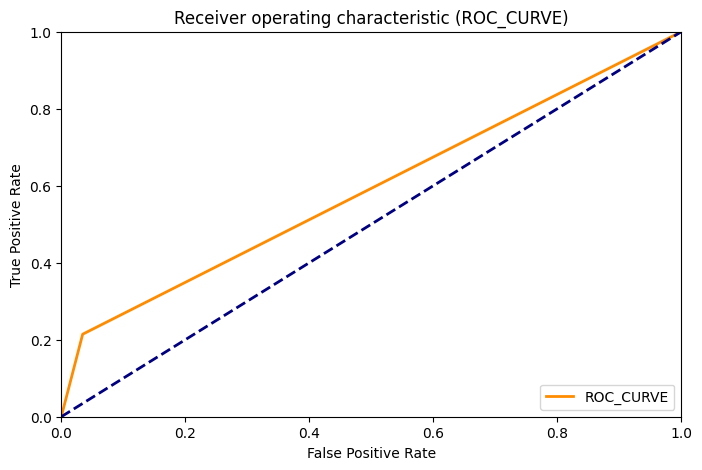

In [ ]:
#ROC curver
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# 0s are negative and 1s are positive
fpr, tpr, _ = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (8,5))
plt.plot(fpr,tpr, label = "ROC_CURVE", lw = 2, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC_CURVE)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.legend(loc = 'lower right')
plt.show()

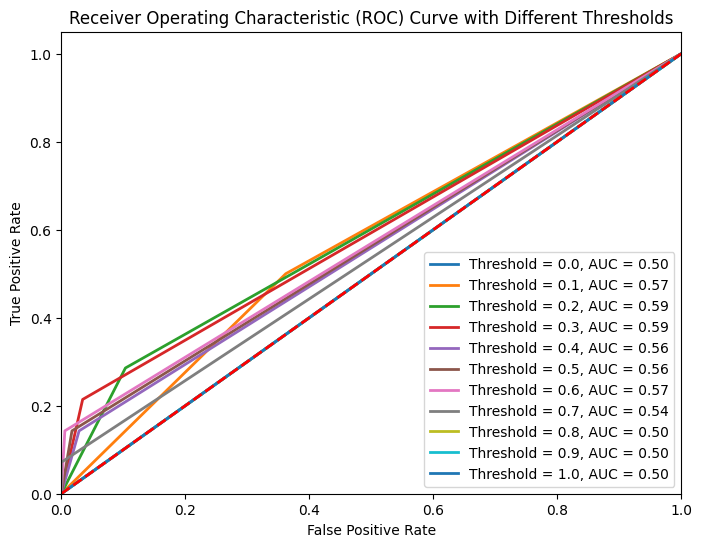

In [ ]:
# Plot ROC curve for different thresholds
plt.figure(figsize=(8, 6))
for threshold in np.arange(0, 1.01, 0.1):
    y_pred_threshold = (y_score[:,1] >= threshold).astype(int)
    fpr_threshold, tpr_threshold, _ = roc_curve(y_test, y_pred_threshold)
    roc_auc_threshold = auc(fpr_threshold, tpr_threshold)
    plt.plot(fpr_threshold, tpr_threshold, lw=2, label='Threshold = %0.1f, AUC = %0.2f' % (threshold, roc_auc_threshold))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Different Thresholds')
plt.legend(loc="lower right")
plt.show()

In [ ]:
hypertrees = 400
depth = 3

In [ ]:
rf_classifier_resampled = RandomForestClassifier(n_estimators=hypertrees, max_depth=depth, random_state=42)
rf_classifier_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=3, n_estimators=400, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier_resampled.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)

Accuracy: 0.6436170212765957
Recall: 0.5


In [ ]:
# Construct Confusion Matrix
constructed_confusion_matrix_resampled = confusion_matrix(y_pred, y_test)

# Print Confusion Matrix
print("Confusion matrix using sklearn \n \n", constructed_confusion_matrix_resampled)

Confusion matrix using sklearn 
 
 [[168  12]
 [  6   2]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()